# Lab 4 Fish dataset

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split



In [3]:
data = pd.read_csv('/Users/nitin/Desktop/Fish.csv')


In [6]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
data.shape


(159, 7)

In [9]:
data.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'},inplace = True) # 'inplace= true' to make change in current dataframe
data.sample(5) # Display random 5 records


,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
19,Bream,650.0,31.0,33.5,38.7,14.4738,5.7276
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [26]:
df_data = data.Species.value_counts()

df_data = pd.DataFrame(df_data)

df_data

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


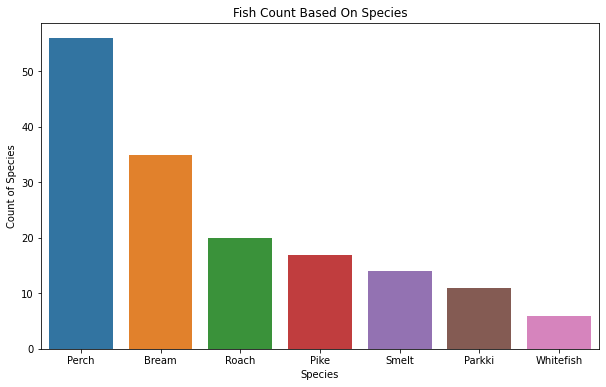

In [27]:
sns.barplot(x = df_data.index, y = df_data.Species) # df_sp.index will returns row labels of dataframe
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Fish Count Based On Species')
plt.show()


In [28]:
X = data[['Height','Width']] # Select columns using column name
X.head()


,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [30]:
y = data[['Weight']]
y.head(5)


,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [33]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42) 


In [34]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [35]:
print('score= ', model.score(X_test,y_test))


score=  0.8327992282313174


In [36]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Weight,78.000000,13.400000,200.000000,270.0000,150.000000,1000.000000,7.000000,180.000000,188.000000,1250.000000,...,500.000000,500.000000,955.000000,1100.000000,170.00000,270.000000,6.700000,9.900000,510.000000,70.000000
Predicted Weight,138.442587,-210.898352,185.942712,352.2524,232.138022,805.500663,-234.321345,286.842536,334.784727,865.513882,...,381.950025,492.799798,746.361582,948.415492,252.01437,352.102999,-253.093371,-230.404691,389.551925,103.717129


/Users/nitin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

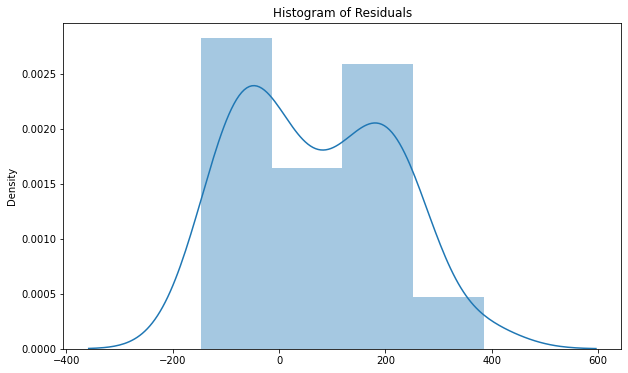

In [37]:
sns.distplot((y_test-model.predict(X_test)))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")
